## GEARS only performance comparison to multiple null models (Adamson)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wandb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import font_manager

font_dirs = ["./"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
    
sns.set( font = "Helvetica" )
api = wandb.Api()


# Project is specified by <entity/project-name> please replace it with your project name here:
# runs = api.runs("kexinhuang/pert_gnn_simulation_" + data_name)
runs = api.runs("yroohani/adamson")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

In [2]:
### Make sure the run names match exactly with the wandb names!!

run = 6
pertnet_runs = ['preprint_benchmark_gears_' + str(i) for i in range(1, run)]
no_perturb_runs = ['preprint_benchmark_no_perturb' + str(i) for i in range(1, run)]
median_baseline_runs = ['median_' + str(i) for i in range(1, run)]
mean_baseline_runs = ['mean_' + str(i) for i in range(1, run)]

In [4]:
res_df = runs_df[runs_df.name.isin(pertnet_runs + no_perturb_runs + median_baseline_runs + mean_baseline_runs)]

In [5]:
res_df

,summary,config,name
0,"{'test_combo_seen1_pearson_de': 'NaN', 'test_c...","{'G_go': None, 'device': 'cuda:5', 'baseline':...",mean_5
1,"{'test_combo_seen1_pearson': 'NaN', 'test_frac...","{'G_go': None, 'device': 'cuda:5', 'baseline':...",mean_4
2,{'test_unseen_single_mse': 0.00370040535926818...,"{'G_go': None, 'device': 'cuda:5', 'baseline':...",mean_3
3,{'test_unseen_single_pearson_delta': 0.7287285...,"{'G_go': None, 'device': 'cuda:5', 'baseline':...",mean_2
4,{'test_unseen_single_mse': 0.00456240586936473...,"{'G_go': None, 'device': 'cuda:5', 'baseline':...",mean_1
5,"{'test_de_pearson': 0.9576981868216486, 'test_...","{'G_go': None, 'device': 'cuda:5', 'baseline':...",median_5
6,"{'_step': 37, 'test_de_mse': 0.092414207756519...","{'G_go': None, 'device': 'cuda:5', 'baseline':...",median_4
7,"{'test_mse': 0.004068806301802397, 'test_combo...","{'G_go': None, 'device': 'cuda:5', 'baseline':...",median_3
8,"{'_timestamp': 1690888769.2094738, 'test_unsee...","{'G_go': None, 'device': 'cuda:5', 'baseline':...",median_2
9,{'test_unseen_single_mse': 0.00455030985176563...,"{'G_go': None, 'device': 'cuda:5', 'baseline':...",median_1


In [6]:
def normalize_name(x):
    if x in pertnet_runs:
        return 'GEARS'
    elif x in median_baseline_runs:
        return 'Median-Baseline'
    elif x in mean_baseline_runs:
        return 'Mean-Baseline'
    else:
        return 'No-Perturb'

In [7]:
metrics = ['test_mse_top20_de_non_dropout', 'test_pearson_delta']
metrics_name_map = {'test_mse_top20_de_non_dropout': 'Top 20 DE MSE',
                   'test_pearson_delta': 'Pearson Correlation Across All Genes'}
out = {}
out['method'] = [normalize_name(i) for i in res_df.name.values]
for m in metrics:
    out[metrics_name_map[m]] = res_df.summary.apply(lambda x: x[m])
out = pd.DataFrame(out)

In [10]:
color_pal = {
'GEARS': (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
'No-Perturb': (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
'Median-Baseline': (0.4, 0.7607843137254902, 0.6470588235294118),
'Mean-Baseline': (0.9058823529411765, 0.5411764705882353, 0.7647058823529411)}

In [11]:
pal_order = [color_pal[i] for i in pd.DataFrame(out).method.unique()]

In [12]:
import numpy as np
normalize = np.mean(out[out.method == 'No-Perturb']['Top 20 DE MSE'])
out['Normalized MSE of Top 20 DE Genes'] = out['Top 20 DE MSE'].values/normalize

In [13]:
out

,method,Top 20 DE MSE,Pearson Correlation Across All Genes,Normalized MSE of Top 20 DE Genes
0,Mean-Baseline,0.188437,0.698068,0.528194
1,Mean-Baseline,0.090405,0.825606,0.253407
2,Mean-Baseline,0.150499,0.816871,0.421853
3,Mean-Baseline,0.226225,0.728729,0.634113
4,Mean-Baseline,0.151181,0.708388,0.423765
5,Median-Baseline,0.202850,0.701126,0.568594
6,Median-Baseline,0.092625,0.843206,0.259630
7,Median-Baseline,0.166194,0.796447,0.465844
8,Median-Baseline,0.248402,0.702808,0.696274
9,Median-Baseline,0.156588,0.715753,0.438921


In [17]:
means = out.groupby('method').mean().loc[:, 'Normalized MSE of Top 20 DE Genes']
print((means['Mean-Baseline'] - means['GEARS'])/means['Mean-Baseline'])
print((means['Median-Baseline'] - means['GEARS'])/means['Mean-Baseline'])

0.05141674071090007
0.1256794545468145


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Adamson')

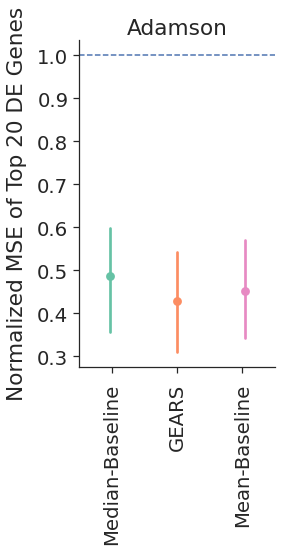

In [16]:
sns.set(rc={'figure.figsize':(3.5,6)})
sns.set_theme(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)}, font = "Helvetica", font_scale=1.8)

g = sns.pointplot('method', 'Normalized MSE of Top 20 DE Genes', 
    data=pd.DataFrame(out), 
    order = ['Median-Baseline', 'GEARS', 'Mean-Baseline'], 
    hue = 'method',
    palette=[color_pal['Median-Baseline'], color_pal['GEARS'], color_pal['Mean-Baseline']],              
    dodge=True, 
    join=False,
    hue_order = ['Median-Baseline', 'GEARS', 'Mean-Baseline'])
sns.despine()
g.legend_.remove()
g.set(xlabel=None)
g.axhline(1, linestyle="dashed")

plt.ylabel("Normalized MSE of Top 20 DE Genes",labelpad=10)
plt.tick_params(axis='x', which='major', pad=10)
plt.tick_params(axis='y', which='major', pad=5)
plt.xticks(rotation=90)

plt.title('Adamson')